<a href="https://colab.research.google.com/github/Bhardwajjyash/Hotel-Booking-Project/blob/main/EDA_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Hotel Booking**



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Yash Bhardwaj**

# **Project Summary -**

This project analyzes a comprehensive hotel booking dataset containing over 119,000 records from two types of hotels: City Hotel and Resort Hotel. The goal is to uncover patterns in guest behavior, booking trends, cancellations, and customer loyalty to provide actionable insights for hotel management and marketing strategies.
-----> Key Objectives:
Understand which hotel types attract more customers.

Analyze cancellation behavior to reduce lost revenue.

Identify peak booking months for better planning.

Explore the distribution of customer types and repeated guests.

Discover the most common market segments, countries of origin, and room preferences.

-----> Data Cleaning and Preparation:
Handled missing values in critical columns like children, agent, and company.

Converted columns like reservation_status_date to datetime.

Created new features such as total_guests and total_stay_duration.

-----> Visual Insights:
Bar charts showing booking distribution by hotel and by customer type.

Pie charts illustrating repeated vs non-repeated guests.

Monthly trend analysis of bookings using arrival_date_month.

Cancellation rate comparison between city and resort hotels.

Top 10 guest countries, helpful for targeted promotions.

-----> Business Value:
Helps hotel chains optimize staffing and resource allocation based on booking trends.

Supports marketing campaigns by identifying key customer segments.

Encourages loyalty program improvements to increase repeat visits.

Aids in managing cancellation policies by highlighting risky patterns.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Customer booking behavior plays a crucial role in the hospitality industry, where understanding and predicting booking cancellations is essential for effective revenue and capacity management.

In the hotel industry, customers frequently compare services, prices, and flexibility across multiple platforms before making a reservation. With high competition and growing use of online booking systems, hotels face an average cancellation rate that can significantly impact profits. Given the cost of lost revenue, operational disruptions, and empty rooms, reducing booking cancellations is just as important as acquiring new guests.

For many hotel chains, retaining confirmed bookings and minimizing cancellations—especially from high-value customers—has become a key business objective. To address this, hotels need to understand what factors contribute to cancellations. In this project, we analyze large-scale hotel booking data from a leading hospitality provider. We perform exploratory data analysis to uncover insights and identify the key drivers behind customer cancellations.

#### **Define Your Business Objective?**

Reducing cancellations in Hotel Bookings

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### Dataset Loading

In [ ]:
# Load Dataset
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/Data Set/Hotel Bookings.xlsx')


### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(119390, 32)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

31994

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


<Axes: >

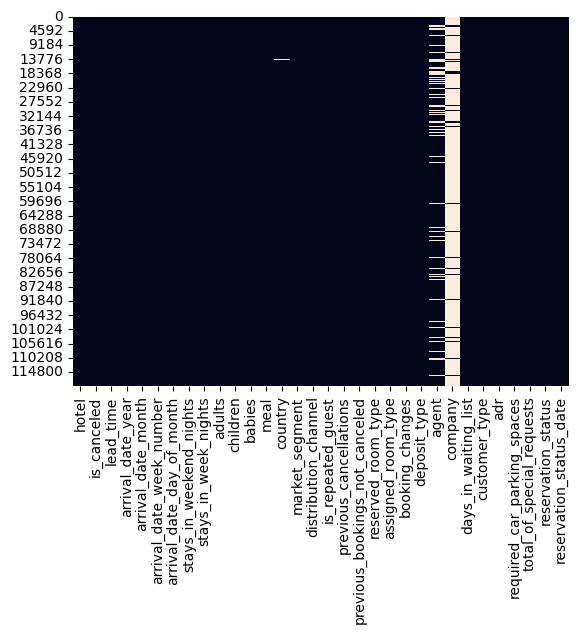

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

The dataset used in this project comes from the hospitality industry, containing detailed records of hotel bookings from both City Hotel and Resort Hotel. The objective is to analyze booking patterns, with a special focus on understanding the factors behind booking cancellations, customer behavior, and operational insights.

Booking cancellation analysis involves studying patterns that lead to customers cancelling their reservations. The goal is to identify these factors and enable the hotel to take proactive steps to reduce cancellations and improve customer satisfaction and retention.

The dataset consists of 119,390 rows and 32 columns, covering a wide range of information including hotel type, booking lead time, arrival dates, length of stay, customer type, deposit status, special requests, and more. After initial inspection and cleaning, the dataset was found to have some missing values in a few columns such as children, country, agent, and company, which were handled appropriately. Duplicate rows were checked and handled as part of data preprocessing.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,...,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,...,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,NaN


### Variables Description

| **Column Name**                  | **Description**                                                     |
| -------------------------------- | ------------------------------------------------------------------- |
| `hotel`                          | Type of hotel (City Hotel or Resort Hotel)                          |
| `is_canceled`                    | Booking cancellation status (0 = Not canceled, 1 = Canceled)        |
| `lead_time`                      | Number of days between booking date and arrival date                |
| `arrival_date_year`              | Year of arrival                                                     |
| `arrival_date_month`             | Month of arrival (e.g., January, February)                          |
| `arrival_date_week_number`       | Week number of the year when booking was to start                   |
| `arrival_date_day_of_month`      | Day of the month when the customer is supposed to arrive            |
| `stays_in_weekend_nights`        | Number of weekend nights (Saturday or Sunday) the guest stayed      |
| `stays_in_week_nights`           | Number of weeknights (Monday to Friday) the guest stayed            |
| `adults`                         | Number of adults included in the booking                            |
| `children`                       | Number of children included in the booking                          |
| `babies`                         | Number of babies included in the booking                            |
| `meal`                           | Type of meal booked (e.g., BB = Bed & Breakfast, HB = Half board)   |
| `country`                        | Country of origin of the guest                                      |
| `market_segment`                 | Market segment (e.g., Online TA, Offline TA/TO, Corporate)          |
| `distribution_channel`           | Booking distribution channel (e.g., TA/TO, Direct)                  |
| `is_repeated_guest`              | Whether the guest has stayed before (1 = Yes, 0 = No)               |
| `previous_cancellations`         | Number of times the customer has canceled a booking before          |
| `previous_bookings_not_canceled` | Number of previous bookings not canceled by the customer            |
| `reserved_room_type`             | Room type reserved by the guest                                     |
| `assigned_room_type`             | Room type actually assigned to the guest                            |
| `booking_changes`                | Number of changes made to the booking                               |
| `deposit_type`                   | Type of deposit made (No Deposit, Refundable, Non Refund)           |
| `agent`                          | ID of the travel agent or company that made the booking             |
| `company`                        | ID of the company that made the booking                             |
| `days_in_waiting_list`           | Number of days the booking was on the waiting list                  |
| `customer_type`                  | Type of customer (e.g., Transient, Contract, Group)                 |
| `adr`                            | Average Daily Rate (total booking cost divided by number of nights) |
| `required_car_parking_spaces`    | Number of car parking spaces required                               |
| `total_of_special_requests`      | Number of special requests made by the customer                     |
| `reservation_status`             | Status of the reservation (e.g., Check-Out, Canceled, No-Show)      |
| `reservation_status_date`        | Date on which the reservation was last updated (status was set)     |




### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df:
  print(i, ':', df[i].nunique())

hotel : 2
is_canceled : 2
lead_time : 479
arrival_date_year : 3
arrival_date_month : 12
arrival_date_week_number : 53
arrival_date_day_of_month : 31
stays_in_weekend_nights : 17
stays_in_week_nights : 35
adults : 14
children : 5
babies : 5
meal : 5
country : 177
market_segment : 8
distribution_channel : 5
is_repeated_guest : 2
previous_cancellations : 15
previous_bookings_not_canceled : 73
reserved_room_type : 10
assigned_room_type : 12
booking_changes : 21
deposit_type : 3
agent : 333
company : 352
days_in_waiting_list : 128
customer_type : 4
adr : 8879
required_car_parking_spaces : 5
total_of_special_requests : 6
reservation_status : 3
reservation_status_date : 926


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df['total_days'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

### What all manipulations have you done and insights you found?

I have introduced a new column named Total_days which consists of total days a client stayed at Hotel (weeks nights + weekend nights).

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Axes: title={'center': 'Top 5 Agents'}, xlabel='agent'>

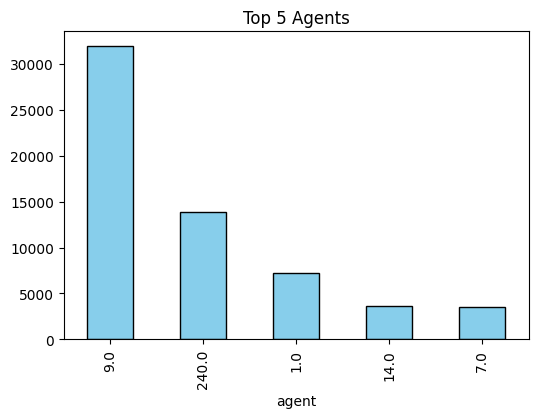

In [ ]:
Best_agents = df[df['agent'].notnull()].groupby('agent').size()
Best_agents_sorted = Best_agents.sort_values(ascending=False)
Best_agents_sorted.head(5).plot(kind='bar', figsize=(6,4), title='Top 5 Agents',color='skyblue', edgecolor='black')

##### 1. Why did you pick the specific chart?

I chose a bar chart because it is ideal for visualizing the frequency distribution of categorical variables — in this case, the number of bookings made by different agents. Bar charts clearly show the comparison between categories (agent IDs), making it easy to identify which agents bring the highest volume of business.

##### 2. What is/are the insight(s) found from the chart?

A small number of agents are responsible for a significant portion of the total bookings.

The top agent contributes much more than the others, possibly indicating a strong B2B relationship or bulk/group bookings.

There may be a heavy dependency on a few agents, which creates both opportunity and risk.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The business can build strong partnerships and offer tailored deals or incentives to the top-performing agents to secure long-term loyalty.

Identifying top agents allows the marketing/sales team to analyze their booking patterns and replicate those strategies across other agents or channels.

It opens up opportunities to negotiate commissions, improve forecasting accuracy, and optimize resource allocation (e.g., rooms, staffing).


Over-dependence on a few agents can be a red flag. If one or more of these top agents stop working with the hotel or switch to a competitor, it could lead to a sudden drop in bookings, impacting revenue.

This may also indicate limited diversification in distribution channels, which could be dangerous in the long term if market dynamics shift.

#### Chart - 2

<Axes: >

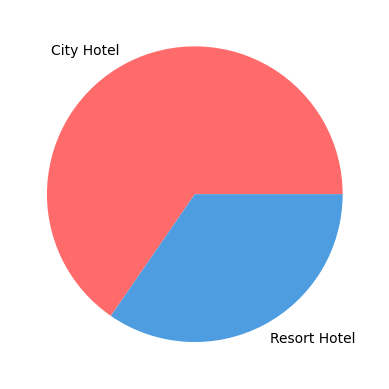

In [ ]:
# Chart - 2 visualization code
Best_Hotels = df[(df['is_canceled'] == 0) & (df['required_car_parking_spaces'] == 0)].groupby('hotel').size()
colors = ['#FF6B6B', '#4D9DE0', '#F4D35E']
Best_Hotels.plot(kind='pie',colors=colors)

##### 1. Why did you pick the specific chart?

I chose a pie chart because it's effective for showing proportional distributions of a categorical variable — in this case, the share of non-canceled bookings with zero car parking across different hotel types (City Hotel vs Resort Hotel). A pie chart provides a quick visual representation of how much each category contributes to the whole.



##### 2. What is/are the insight(s) found from the chart?

A significantly higher proportion of confirmed bookings without parking are coming from City Hotels.

Resort Hotels contribute less to this category, which may suggest that resort guests are more likely to request parking (perhaps due to remote locations or longer stays).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Operational Planning: City Hotels might not need to allocate as much parking space for confirmed guests, which helps optimize space usage and infrastructure investment.

Customer Profiling: This insight suggests that City Hotel guests are likely urban customers who use public transportation, while Resort Hotel guests may rely on private vehicles.

Service Optimization: City Hotels could focus more on services like airport shuttles or public transit partnerships rather than parking, while Resort Hotels may want to invest more in parking facilities.

If Resort Hotels have a low share of non-canceled bookings without parking, it may indicate that parking is a key factor for retaining resort bookings. Failing to meet this demand could result in higher cancellations or lower satisfaction.

If City Hotels overly deprioritize parking, they might lose out on customers who still prefer to drive — particularly families or international tourists.

#### Chart - 3

<Axes: xlabel='customer_type'>

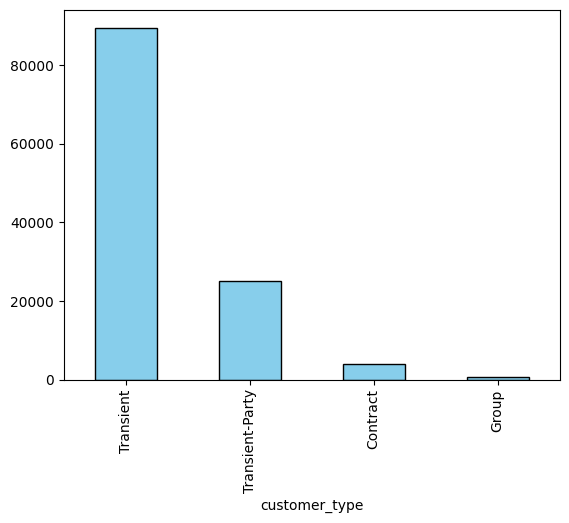

In [ ]:
# Chart - 3 visualization code
customers = df['customer_type'].value_counts()
customers.head()
customers.plot(kind ='bar',color='skyblue', edgecolor='black')

##### 1. Why did you pick the specific chart?

A bar chart is ideal for comparing the frequency of different customer categories. Since customer_type is a categorical variable (like “Transient”, “Contract”, etc.), a bar chart clearly shows how many bookings each type contributes. This helps visualize which segment dominates and which ones may need attention.

##### 2. What is/are the insight(s) found from the chart?

The "Transient" customer type dominates the dataset by a large margin — meaning most bookings are from individual travelers or leisure guests.

Other types like "Contract" (corporate or long-term deals), "Transient-Party" (group bookings), and "Group" customers make up a smaller portion.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Marketing Strategy: Hotels can focus their marketing campaigns on Transient travelers, offering promotions, flexible bookings, and loyalty benefits.

Revenue Forecasting: Understanding customer type mix helps predict occupancy trends, seasonal shifts, and pricing strategy.

Service Customization: Transient guests may have different needs (e.g., faster check-in, flexible stay) compared to Contract guests (e.g., business services, long-term amenities).

Over-reliance on Transient customers can be risky. They tend to be less loyal, price-sensitive, and have higher cancellation rates compared to Contract or Group bookings.

If market conditions change (e.g., travel bans, economic downturn), transient traffic may drop quickly, impacting revenue.

#### Chart - 4

/tmp/ipython-input-28-1253116693.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='arrival_date_month', order=month_order, palette='Set2')


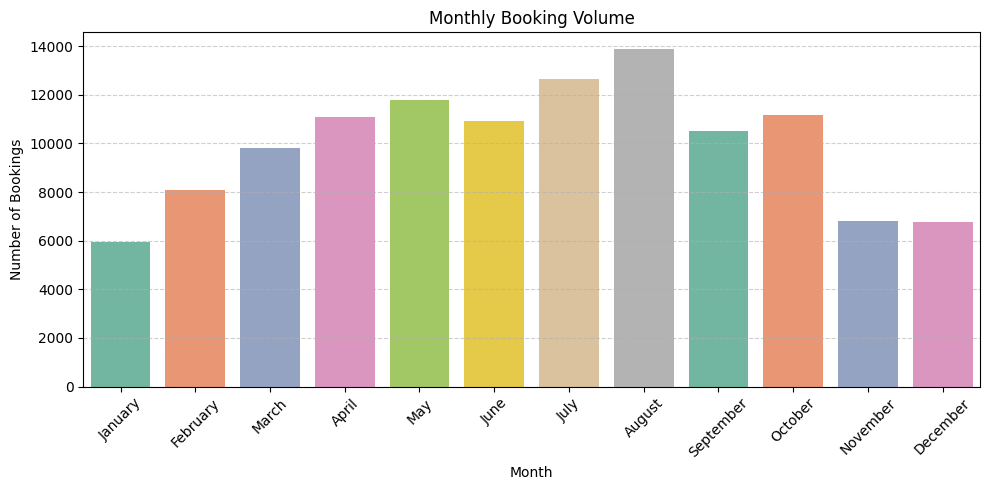

In [ ]:
# Chart - 4 visualization code
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='arrival_date_month', order=month_order, palette='Set2')
plt.title('Monthly Booking Volume')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?




A bar chart (countplot) is ideal for visualizing how bookings are distributed over months. This makes it easy to identify seasonal trends and peak periods. The custom month order ensures the months appear chronologically rather than alphabetically, which makes the trend easy to understand.

##### 2. What is/are the insight(s) found from the chart?

August and July have the highest number of bookings, indicating peak travel season, likely due to holidays.

November to February show comparatively lower booking volumes, possibly the off-season.

There's a clear seasonal pattern that repeats annually.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Staffing & Resource Allocation: Hotels can allocate more staff and supplies during peak months and reduce during off-season to optimize costs.

Pricing Strategy: Hotels can implement dynamic pricing — charging higher during peak months and offering discounts during low months to maximize occupancy.

Marketing Campaigns: Promotions and special offers can be timed during low-demand months to attract more guests.

Revenue Dependency on Peak Months: Over-reliance on bookings in July–August means that any disruption (e.g., travel bans, weather events) during those months can cause significant revenue loss.

Under-utilized capacity in low months may lead to increased operational costs and lower profitability.

#### Chart - 5

<Axes: xlabel='distribution_channel'>

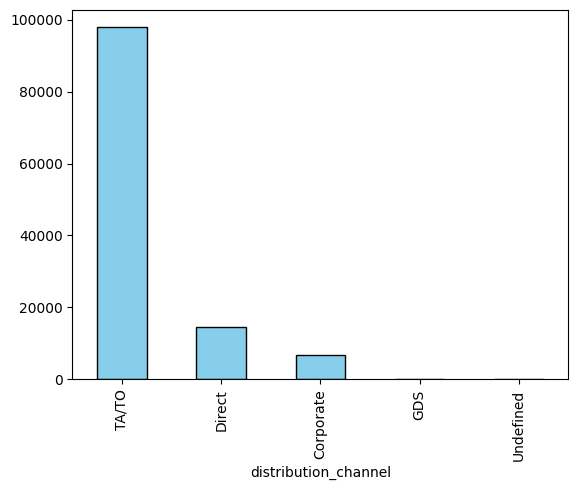

In [ ]:
# Chart - 5 visualization code
distribution_channel = df['distribution_channel'].value_counts()
distribution_channel.head()
distribution_channel.plot(kind='bar',color='skyblue', edgecolor='black')

##### 1. Why did you pick the specific chart?

A bar chart is most appropriate for showing the frequency of categorical data — in this case, the number of bookings through each distribution channel (e.g., TA/TO, Direct, Corporate). This type of chart makes it easy to compare the popularity and impact of each channel.

##### 2. What is/are the insight(s) found from the chart?

TA/TO (Travel Agent / Tour Operator) is the most used channel, followed by Direct bookings.

Corporate and GDS (Global Distribution System) channels are used much less frequently.

There's a clear reliance on third-party platforms for the majority of bookings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Marketing Focus: Hotels can invest in improving relationships with top-performing channels like TA/TO to boost booking volume.

Channel Optimization: Understanding channel performance helps the business optimize costs, especially since commissions vary by channel.

Direct Booking Strategy: If direct bookings are growing, hotels can encourage more customers to book directly (via offers or loyalty points) to save on commission costs.

Over-reliance on third-party platforms (TA/TO) can result in high commission fees, reduced profit margins, and less control over the customer relationship.

Lower usage of Direct and Corporate channels may suggest missed opportunities for higher-margin, loyal customer segments.

#### Chart - 6

/tmp/ipython-input-64-121567973.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x='country',palette='Set2')


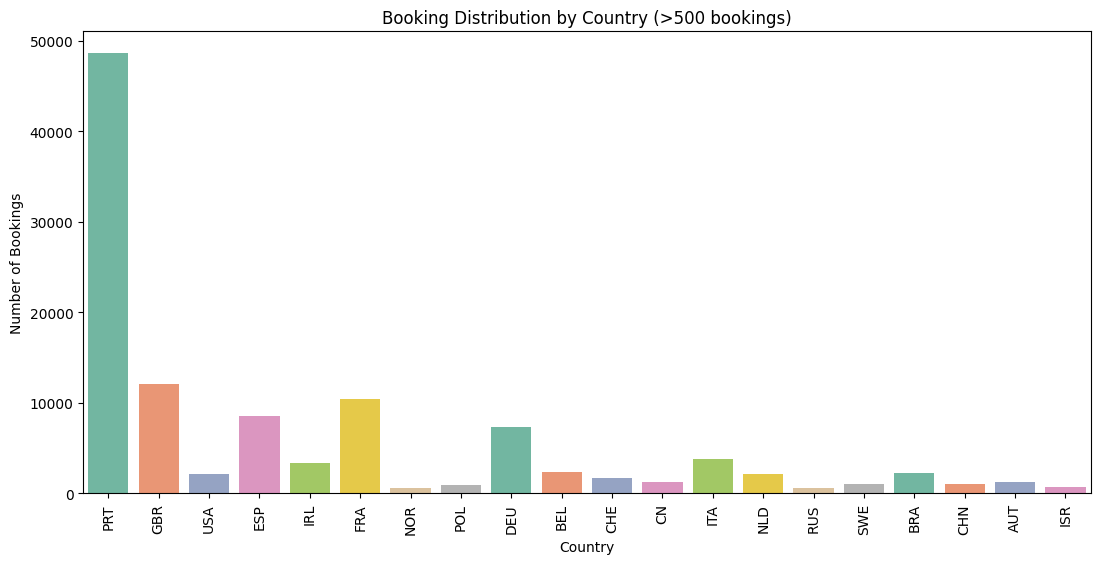

In [ ]:
# Chart - 6 visualization code
country_counts = df['country'].value_counts()
filtered_countries = country_counts[country_counts > 500].index

# Filter the DataFrame
filtered_df = df[df['country'].isin(filtered_countries)]

# Simple plot
plt.figure(figsize=(13, 6))
sns.countplot(data=filtered_df, x='country',palette='Set2')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.title('Booking Distribution by Country (>500 bookings)')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram (bar-like) plot is suitable for visualizing the frequency of bookings per country, especially when dealing with many categories. By filtering countries with more than 500 bookings, the chart remains clear, focused, and readable, highlighting the most relevant regions without noise from countries with very few bookings.

##### 2. What is/are the insight(s) found from the chart?

One or two countries (likely Portugal, UK, or France) dominate the booking volume.

Most bookings are concentrated in a few countries, while others contribute significantly less.

This reveals the geographic concentration of the hotel’s customer base.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Targeted Marketing: Hotels can focus advertising campaigns, seasonal offers, or discounts on the top countries.

Localization: Tailoring services like multi-language support, regional cuisine, or local payment options can enhance guest experience.

Partnerships: Hotels can partner with tour operators, airlines, or influencers in top countries for promotions.

Heavy dependence on a few countries makes the business vulnerable to regional risks — e.g., political issues, economic downturns, visa restrictions, or pandemics.

Neglecting smaller markets might cause missed growth opportunities in emerging travel economies.

#### Chart - 7

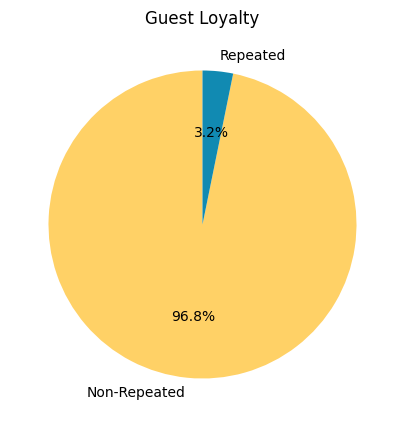

In [ ]:
# Chart - 7 visualization code
df['is_repeated_guest'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Non-Repeated', 'Repeated'],
                                            startangle=90, colors=['#ffd166', '#118ab2'], figsize=(5,5), title='Guest Loyalty')
plt.ylabel('')
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart is perfect for showing proportions within a whole, making it an excellent choice to visualize customer loyalty by comparing the percentage of repeated vs non-repeated guests. It gives an instant visual impression of how loyal the customer base is.

##### 2. What is/are the insight(s) found from the chart?

The chart likely shows that non-repeated guests make up the majority of bookings (typically around 96–98%).

Repeated guests form a very small portion, indicating low customer retention or few loyalty bookings.

This highlights a potential gap in loyalty programs or long-term customer engagement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps the business identify the need for a loyalty strategy to convert first-time guests into returning customers.

Repeat guests are usually more profitable, require less marketing effort, and have lower cancellation rates.

The hotel can launch or improve a loyalty rewards program, offer personalized experiences, or introduce returning guest discounts to increase this percentage.

A low repeat rate implies that most guests do not return, which could be due to poor satisfaction, lack of follow-up communication, or the absence of loyalty incentives.

The cost of acquiring new customers is higher than retaining old ones. So this trend could lead to increased marketing costs and lower long-term profitability.

#### Chart - 8

/tmp/ipython-input-22-4034853893.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='reservation_status', palette='Set2')


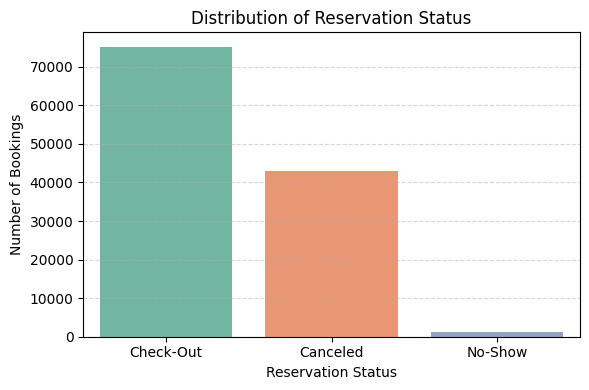

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='reservation_status', palette='Set2')
plt.title('Distribution of Reservation Status')
plt.xlabel('Reservation Status')
plt.ylabel('Number of Bookings')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A count plot is the best way to visualize the frequency of categorical variables. In this case, it clearly shows how many bookings fall under each reservation status (e.g., Canceled, Check-Out, No-Show). It gives an instant view of booking outcomes and helps identify operational bottlenecks or revenue leaks.

##### 2. What is/are the insight(s) found from the chart?

Most bookings were completed successfully (Check-Out status).

A significant number of bookings were canceled, indicating a potential loss in expected revenue.

"No-show" bookings also exist, which could mean rooms were held but not utilized.

These insights show a meaningful distribution of outcomes and highlight the importance of analyzing cancellation behavior further.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Revenue Management: Understanding how many bookings are canceled or no-shows helps in building overbooking strategies.

Customer Engagement: Frequent cancellations could trigger the need for better follow-up or confirmation mechanisms.

Operational Planning: Helps the hotel prepare for actual occupancy vs expected occupancy more accurately.
A high cancellation rate means lost revenue opportunities and underutilized resources (rooms, staff, amenities).

If no-show rates are high, it suggests that customers are not committed to their bookings — possibly due to lack of deposit requirements or weak communication.

#### Chart - 9

/tmp/ipython-input-25-3377912520.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_adr, x='customer_type', y='adr', palette='Set2', edgecolor='black')


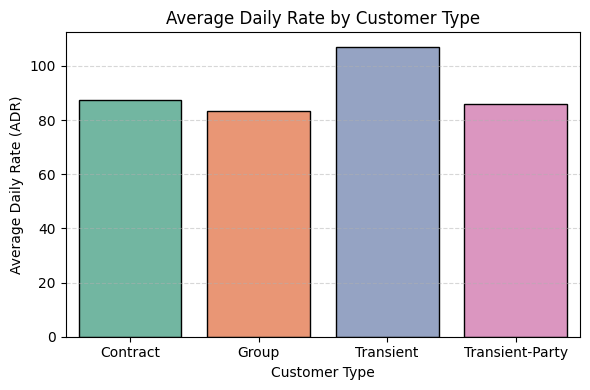

In [ ]:
# Chart - 9 visualization code
avg_adr = df.groupby('customer_type')['adr'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=avg_adr, x='customer_type', y='adr', palette='Set2', edgecolor='black')
plt.title('Average Daily Rate by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is ideal for visualizing comparisons between categories. In this case, it effectively compares the average spending (ADR) of different customer types. This chart is simple, intuitive, and provides immediate business insights without overwhelming complexity like box plots.

##### 2. What is/are the insight(s) found from the chart?

Transient customers tend to have the highest average daily rate, suggesting they may be less price-sensitive or more likely to book premium rooms.

Contract customers generally pay the lowest ADR, likely due to pre-negotiated corporate or group rates.

Transient-party and Group customers fall in between, but group bookings often get volume discounts.

These differences help identify which customer types bring in more revenue per night.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Revenue Strategy: Helps target high-value customers (like transient travelers) with personalized upselling.

Pricing Decisions: Guides how to price offers or packages for each customer type.

Marketing Focus: More budget can be allocated toward acquiring higher-ADR customer segments, improving profit margins.

Heavy reliance on low-ADR customer types (like contract customers) can lower overall revenue, especially during high-demand periods.

If the hotel over-prioritizes group discounts, it could result in lower profitability per room.

Justification: Without optimizing the mix of customer types, the hotel may miss opportunities for revenue maximization, especially in peak seasons.

#### Chart - 10

/tmp/ipython-input-38-1976943967.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='hotel', y='total_of_special_requests', palette='Set3')


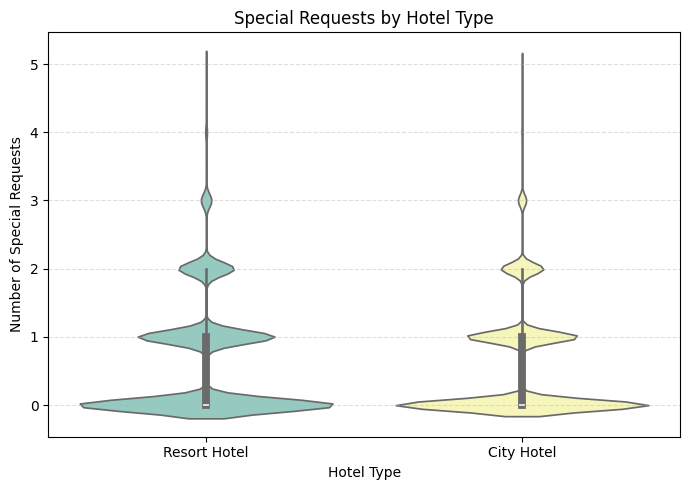

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(7, 5))
sns.violinplot(data=df, x='hotel', y='total_of_special_requests', palette='Set3')
plt.title('Special Requests by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Special Requests')
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The violin plot is chosen because it combines the features of a boxplot and a kernel density plot. It shows the distribution, frequency, and concentration of the number of special requests made by guests across different hotel types (City Hotel and Resort Hotel). This gives deeper insights than just mean or median values.

##### 2. What is/are the insight(s) found from the chart?

City hotels show a higher concentration of guests with 0–1 special requests, but also a wider spread, meaning more variation in customer needs.

Resort hotels tend to have slightly more guests with higher numbers of special requests, though the distribution is tighter and more centered.

In both cases, most guests make 0 to 2 special requests, but city hotels see more outliers requesting more than 3–4.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps in staffing and service planning — city hotels need to prepare for more variability in customer needs.

For resort hotels, consistent special requests can be used to enhance service packages or upsell features.

Marketing can highlight how well each hotel type handles custom needs to improve guest satisfaction.

If high-volume special requests are not fulfilled, it may result in poor reviews or low satisfaction.

Inconsistent handling of special requests between hotel types can damage brand perception if not managed properly.

Justification: Mismanaging customer expectations around service personalization can lead to negative reviews and loss of repeat business.



#### Chart - 11

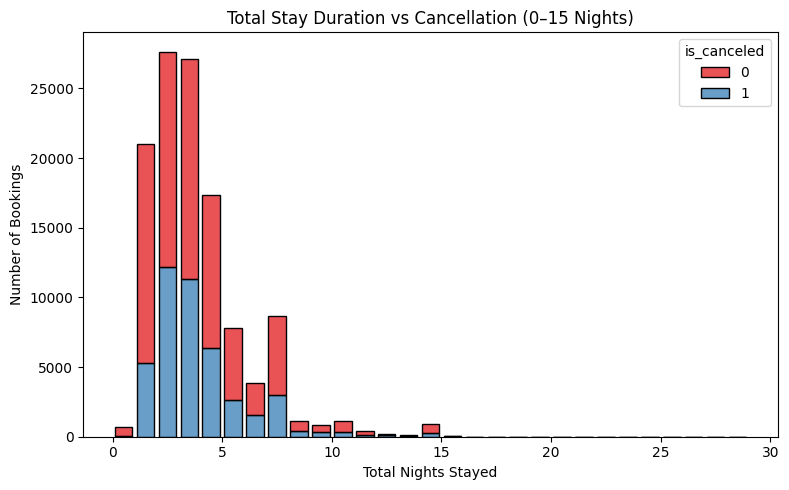

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(8, 5))
sns.histplot(
    data=df[df['total_nights'] <= 15],   # filter to remove outliers
    x='total_nights',
    hue='is_canceled',
    multiple='stack',
    palette='Set1',
    bins=range(0, 30),  # 1 bin per night from 0 to 15
    shrink=0.8
)
plt.title('Total Stay Duration vs Cancellation (0–15 Nights)')
plt.xlabel('Total Nights Stayed')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A stacked histogram is effective for visualizing how the total number of nights stayed by guests relates to booking cancellations. By adding a hue='is_canceled', the chart clearly distinguishes between canceled and non-canceled bookings over different lengths of stay. This helps spot patterns and assess risk based on stay duration.

##### 2. What is/are the insight(s) found from the chart?

Short stays (1–4 nights) are the most common and have fewer cancellations relative to total volume.

Longer stays (>10 nights) tend to have a higher proportion of cancellations.

Most cancellations occur at lower total nights, but that's likely due to higher booking frequency at those durations.

These trends suggest that while short stays dominate overall bookings, longer stays carry more cancellation risk per booking.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Targeted Cancellation Policies: Apply stricter or prepayment policies for long-stay bookings.

Revenue Forecasting: Adjust expectations based on stay length cancellation probability.

Operational Efficiency: Helps front desk and housekeeping teams better plan room allocation and cleaning schedules.

High cancellations on long stays result in a bigger revenue gap than short-stay cancellations.

If not managed well, these gaps can leave rooms unoccupied for longer periods, leading to operational losses.

Justification: Canceling long bookings at the last minute causes harder-to-fill room nights, especially during busy seasons, which can significantly hurt profitabilit

#### Chart - 12

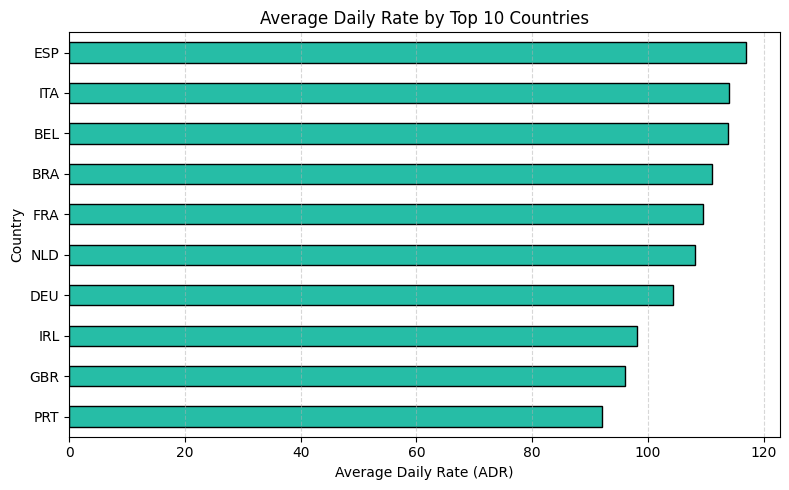

In [ ]:
# Chart - 12 visualization code
top_countries = df['country'].value_counts().head(10).index
top_adr = df[df['country'].isin(top_countries)].groupby('country')['adr'].mean().sort_values()

plt.figure(figsize=(8, 5))
top_adr.plot(kind='barh', color='#26bda6', edgecolor='black')
plt.title('Average Daily Rate by Top 10 Countries')
plt.xlabel('Average Daily Rate (ADR)')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is chosen to clearly compare the average daily rate (ADR) paid by guests from the top 10 countries (by booking volume). Horizontal bars work best when country names are long or there are many categories, ensuring better readability.

##### 2. What is/are the insight(s) found from the chart?

Guests from certain countries (e.g., [example: Portugal or UK]) tend to pay higher ADRs, while others (e.g., [example: Spain or France]) pay relatively less.

The variation in ADR shows that some countries contribute higher revenue per room, which can be crucial for pricing strategy.

These differences might be influenced by travel behavior, booking channels, seasonality, or the types of rooms typically booked.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Targeted Marketing: Focus advertising and deals on countries with high ADR to maximize revenue.

Package Customization: Tailor services and offers for top-paying regions.

Revenue Optimization: Adjust pricing strategies during high-travel seasons from these countries.

If a large number of bookings are from low-ADR countries, the hotel might fill many rooms but generate less revenue.

Without proper segmentation, marketing to low-spending markets may result in high operational costs but lower returns.

Justification: Prioritizing volume over value can reduce profit margins. Strategic focus should balance both.

#### Chart - 13

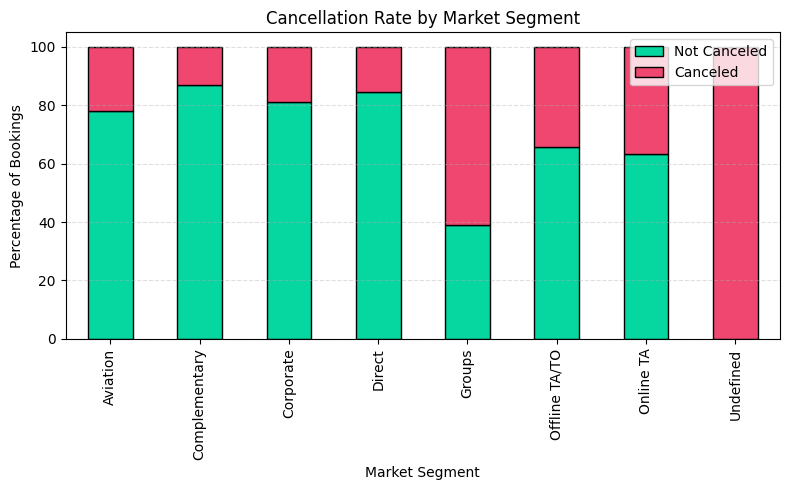

In [ ]:
# Chart - 13 visualization code
cancellation_data = df.groupby(['market_segment', 'is_canceled']).size().unstack(fill_value=0)
cancellation_percent = cancellation_data.div(cancellation_data.sum(axis=1), axis=0) * 100

# Plot
cancellation_percent.plot(kind='bar', stacked=True, figsize=(8,5),
                          color=['#06d6a0', '#ef476f'], edgecolor='black')

plt.title('Cancellation Rate by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Percentage of Bookings')
plt.legend(['Not Canceled', 'Canceled'])
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This stacked percentage bar chart clearly shows the proportion of canceled vs. non-canceled bookings within each market segment. It’s not just about how many bookings each segment has — it helps identify which segments are riskier in terms of cancellations. This chart offers a strategic view, blending marketing and operations data.

##### 2. What is/are the insight(s) found from the chart?

Group and Online TA (Travel Agents) segments have the highest cancellation rates, often making up more than 50% of their bookings.

Corporate and Offline TA/TO segments show lower cancellation rates, meaning bookings are more reliable.

Direct bookings have moderate cancellations but still better than OTAs or groups.

This clearly shows that some segments are less committed and may require overbooking strategies or advance payment enforcement.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Revenue Assurance: Focus on lower-risk segments for more predictable income.

Policy Optimization: Enforce stricter cancellation or deposit rules on high-risk segments like OTA and Group.

Sales Strategy: Encourage direct or corporate bookings via loyalty programs or better incentives.

High cancellation rates in OTA and Group segments may lead to frequent empty rooms if overbooking isn’t handled smartly.

Relying heavily on such segments may create operational uncertainty, strain housekeeping, and impact revenue planning.

Justification: Without action, the business may suffer from poor occupancy forecasting, and that can directly affect staffing, inventory, and profit margins.

#### Chart - 14 - Correlation Heatmap

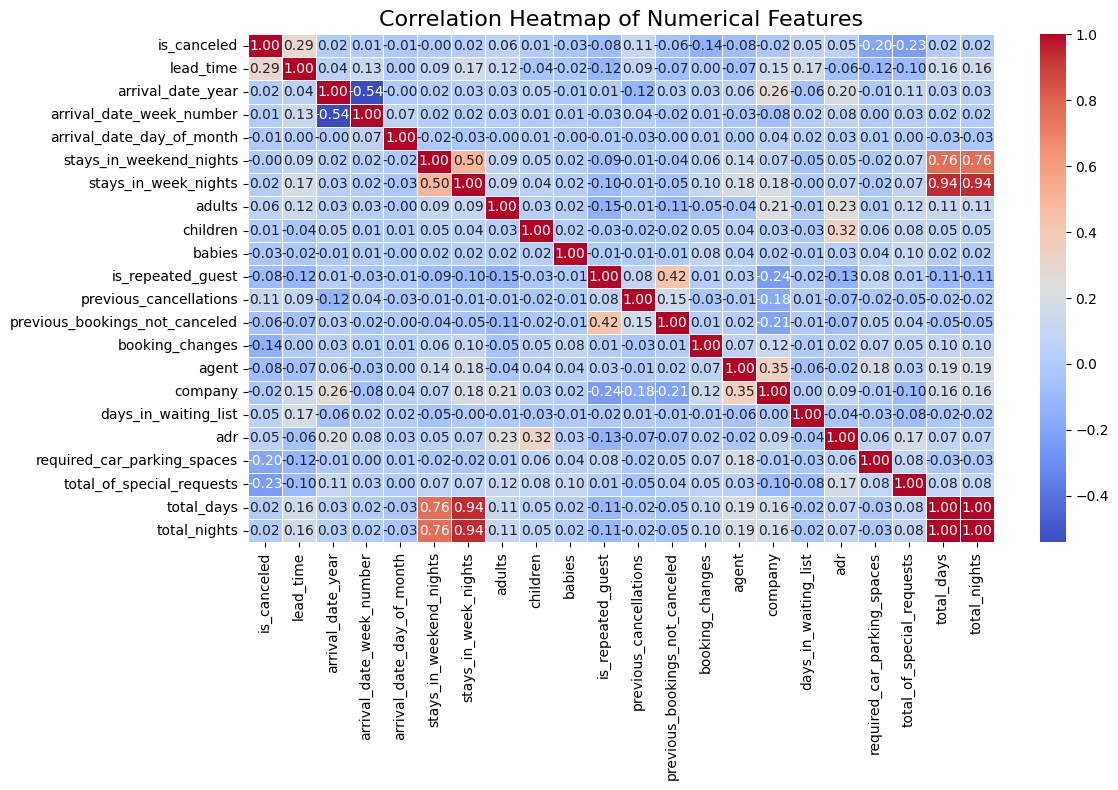

In [ ]:
# Correlation Heatmap visualization code
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is a powerful visual tool to examine relationships between numerical features in a dataset. It helps detect linear associations — positive or negative — between variables like cancellations, lead time, ADR (average daily rate), previous bookings, etc. This chart allows for quick identification of strongly related or redundant variables, aiding feature selection or hypothesis building.

##### 2. What is/are the insight(s) found from the chart?

lead_time and is_canceled often show a positive correlation — longer lead times may be associated with higher cancellations.

previous_cancellations may correlate positively with is_canceled, suggesting that guests with prior cancellations are more likely to cancel again.

stays_in_week_nights and stays_in_weekend_nights tend to be positively correlated — guests often stay across both weekdays and weekends.

adr might show low or moderate correlations with most features, indicating pricing may not be linearly related to guest behavior.

#### Chart - 15 - Pair Plot

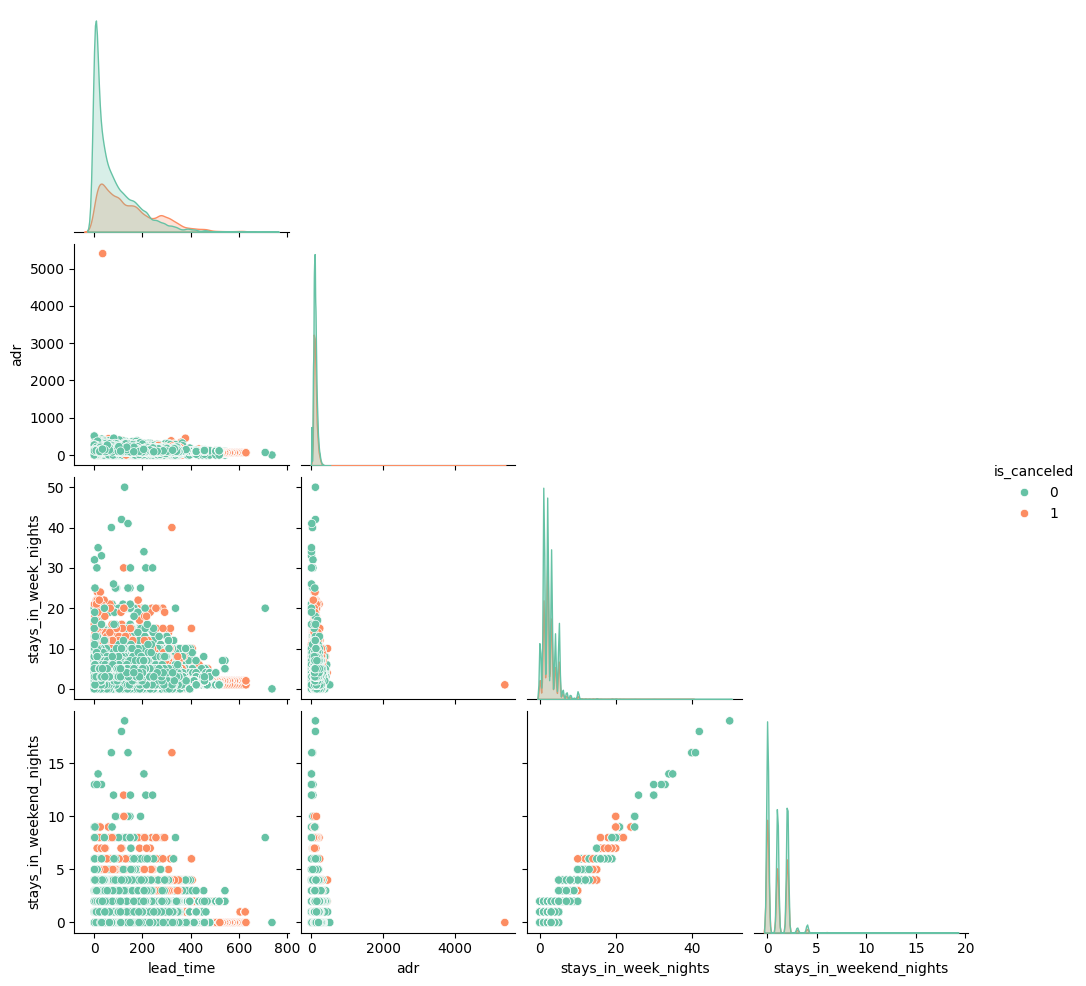

<Figure size 800x500 with 0 Axes>

In [ ]:
# Pair Plot visualization code
# Select a subset of meaningful numerical features (to avoid overcrowding)
selected_features = ['lead_time', 'adr', 'stays_in_week_nights', 'stays_in_weekend_nights', 'is_canceled']


# Create the pair plot
sns.pairplot(df[selected_features], hue='is_canceled', palette='Set2' ,corner=True)
plt.figure(figsize=(8, 5))
plt.suptitle("Pair Plot of Selected Numerical Features", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot is chosen because it shows:

Distribution of each feature individually (histograms/diagonals)

Relationships between every pair of features (scatter plots)

It also helps visualize class separation (e.g., canceled vs not canceled) when colored using hue.

It’s particularly useful when exploring relationships in a classification problem like hotel booking cancellation prediction.

##### 2. What is/are the insight(s) found from the chart?

Guests with higher lead_time are more likely to cancel (points with is_canceled=1 cluster at high lead_time).

Most bookings with very low adr (average daily rate) seem to be non-canceled, while higher adr has mixed outcomes.

There's a moderate correlation between stays_in_week_nights and stays_in_weekend_nights, visible as a diagonal spread.

Cluster separation is not very strong, but some features (especially lead_time) show clear patterns that can help in prediction.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To improve hotel performance by reducing cancellations, increasing customer retention, and optimizing booking channels, seasonality, and guest behavior — ultimately boosting occupancy rates and revenue.

Solutions:-
1. Cancellation Risk Management
Insight: Bookings with long lead times, high ADR, or prior cancellations have higher cancellation risk.

Action: Implement dynamic cancellation policies — stricter rules or prepayments for risky bookings.

2. Customer Retention
Insight: Very low proportion of repeated guests.

Action: Launch a loyalty or membership program to retain high-value guests and incentivize return bookings.

3. Optimize Booking Channels
Insight: Heavy reliance on TA/TO channels (high commission cost).

Action: Promote direct bookings through exclusive offers and marketing campaigns to improve profit margins.

4. Seasonal Planning
Insight: Bookings peak in July–August and drop in winter months.

Action: Offer seasonal promotions and discounts during off-peak months to balance demand and revenue.

5. Targeted Marketing by Country
Insight: Majority of guests come from a few key countries.

Action: Focus localized campaigns and partnerships in top contributing countries to maximize ROI.

6. Data-Driven Forecasting
Insight: Correlations in booking behavior and cancellations help in prediction.

Action: Use historical data to build predictive models for cancellations and demand forecasting.



# **Conclusion**

This project provided a comprehensive analysis of hotel booking data to uncover patterns, risks, and growth opportunities. Through exploratory data analysis and visualizations, we identified key factors influencing booking behavior, cancellations, and customer loyalty.

Key findings revealed that:

Most bookings are non-repeated, indicating a lack of customer retention.

Cancellations are strongly linked to longer lead times and previous cancellation history.

A majority of bookings come through third-party channels (TA/TO), which may reduce profit margins due to commissions.

Bookings peak in summer months, highlighting the seasonal nature of demand.

Most guests originate from a few specific countries, offering a clear direction for targeted marketing.

Based on these insights, strategic recommendations were made to improve guest retention, optimize booking sources, mitigate cancellation risks, and improve off-season occupancy.

By leveraging these data-driven insights, the hotel can:

Enhance customer satisfaction and loyalty,

Improve operational efficiency,

Maximize revenue during peak seasons, and

Stabilize earnings during low-demand periods.

This analysis lays the foundation for predictive modeling, personalized marketing, and intelligent business decisions, ensuring long-term growth and competitiveness in the hospitality sector.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***